In [1]:
from utils_rplan import ROOM_ARRAY_Z
import numpy as np
from PIL import Image
import os
import shutil
import pickle
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon, MultiPolygon, Point
from plot import plot_graph_rplan, plot_polygons_rplan, plot_polygon

In [2]:
"""
This will change the colors of all the .png files from folder_dir to match those
of the density and normal images. 
"""

folder_ori = "..\heat\data\RPLAN_small\original"
folder_density = r"..\heat\data\RPLAN_small\density"
folder_normals = r"..\heat\data\RPLAN_small\normals"
folder_max = r"..\heat\data\RPLAN_small\max"
folder_geo_casper = r"..\heat\data\RPLAN_small\geometry_casper"
folder_geo = r"..\heat\data\RPLAN_small\geometry"
folder_ori_casper = r"..\heat\data\RPLAN_small\original_casper"
folder_annot = r"..\heat\data\RPLAN_small\annot"

# colours corresponding to the types
Background = (0,13,0,0)
Outer_wall = (127,14,0,0)
Inner_wall = (0,16,0,255)
Door = (0,17,0,255)
Front_door = (255,15,0,0)

#for density
dColor_Wall = (213,213,213,255) #white
dColor_Room = (66,66,66,255) #Gray
dColor_Background = (0,0,0,255) #Black

#for normal
nColor_Wall = (0,255,255,255)
nColor_Room = (255,0,0,255)
nColor_Background = (0,0,0,255) #Black

In [3]:
for nr, geo_file in enumerate(os.listdir(folder_geo_casper)):
    data_nr_old = geo_file.replace(".pickle","")
    data_nr_new = str(nr).zfill(5)

    #copy and rename geo file. From geometry_casper to geometry
    original_geo = os.path.join(folder_geo_casper,geo_file)
    target_geo = os.path.join(folder_geo, data_nr_new + ".pickle")
    shutil.copyfile(original_geo, target_geo)
    
    #copy and rename original file. From original_casper to original
    original = os.path.join(folder_ori_casper,data_nr_old + ".png")
    target = os.path.join(folder_ori,data_nr_new + ".png")
    
    shutil.copyfile(original, target)
    
    #And create a mok annot file.
    original_annot = os.path.join(r"..\heat\data\RPLAN_small\sample.npy")
    target_annot = os.path.join(folder_annot,data_nr_new + ".npy")
    
    shutil.copyfile(original_annot, target_annot)
    

In [4]:
for image_nmr in os.listdir(folder_ori):
# check if the image ends with png
    if (image_nmr.endswith(".png")):
        
        # Iterate through each pixel in the image and change color to density color scheme
        density_image = Image.open(os.path.join(folder_ori,image_nmr))
        for x in range(density_image.width):
            for y in range(density_image.height):
                pixel_color = density_image.getpixel((x, y))
                if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                    density_image.putpixel((x, y), dColor_Wall) # use (0,0,0,0) for alpha channel
                if pixel_color == Background:
                    density_image.putpixel((x, y), dColor_Background)
                if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                    density_image.putpixel((x, y), dColor_Room)
        #Save the modified image to density folder
        density_image.save(os.path.join(folder_density,image_nmr))
        print(image_nmr,'Density done')
        
        
        # Iterate through each pixel and change color to normal color scheme
        normal_image = Image.open(os.path.join(folder_ori,image_nmr))
        for x in range(normal_image.width):
            for y in range(normal_image.height):
                pixel_color = normal_image.getpixel((x, y))
                if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                    normal_image.putpixel((x, y), nColor_Wall) # use (0,0,0,0) for alpha channel
                if pixel_color == Background:
                    normal_image.putpixel((x, y), nColor_Background)
                if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                    normal_image.putpixel((x, y), nColor_Room)
        #Save the modified image to normal folder
        normal_image.save(os.path.join(folder_normals,image_nmr))
        print(image_nmr,'Normal done')
        
        # Iterate through each pixel and change color to normal color scheme
        density_array = np.asarray(density_image)
        normal_array = np.asarray(normal_image)
        max_rgb = np.maximum(density_array,normal_array)
        max_image = Image.fromarray(max_rgb)
        max_image.save(os.path.join(folder_max,image_nmr))
        print(image_nmr,'Max done')
        
    else:
        print(image_nmr, 'not a .png file')
        break

00000.png Density done
00000.png Normal done
00000.png Max done
00001.png Density done
00001.png Normal done
00001.png Max done
00002.png Density done
00002.png Normal done
00002.png Max done
00003.png Density done
00003.png Normal done
00003.png Max done
00004.png Density done
00004.png Normal done
00004.png Max done
00005.png Density done
00005.png Normal done
00005.png Max done
00006.png Density done
00006.png Normal done
00006.png Max done
00007.png Density done
00007.png Normal done
00007.png Max done
00008.png Density done
00008.png Normal done
00008.png Max done
00009.png Density done
00009.png Normal done
00009.png Max done
00010.png Density done
00010.png Normal done
00010.png Max done
00011.png Density done
00011.png Normal done
00011.png Max done
00012.png Density done
00012.png Normal done
00012.png Max done
00013.png Density done
00013.png Normal done
00013.png Max done
00014.png Density done
00014.png Normal done
00014.png Max done
00015.png Density done
00015.png Normal 

C:\Users\woute\AppData\Local\Temp\ipykernel_15224\1783840991.py:7: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  geo_image = pickle.load(open(os.path.join(folder_geo, ToCheck + ".pickle"),'rb'))


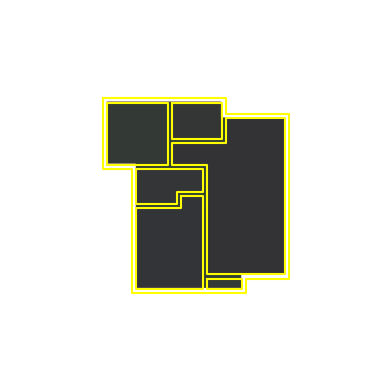

In [5]:
"""
Sanity check
"""
ToCheck = "00002"

ori_image = Image.open(os.path.join(folder_ori, ToCheck + ".png"))
geo_image = pickle.load(open(os.path.join(folder_geo, ToCheck + ".pickle"),'rb'))
geo_wall = geo_image[0][2]

fig, ax = plt.subplots()
ax.imshow(ori_image, alpha=0.8)
ax.axis('off')

for key in geo_wall.keys():
    plot_polygon(ax,geo_wall[key],c='yellow')
